In [2]:
import matplotlib.pyplot as plt
import cv2

#%matplotlib inline
#%pylab notebook #if use this plt will open an 'inline window'

In [3]:
#Load and display image in gray scale unsing OpenCV

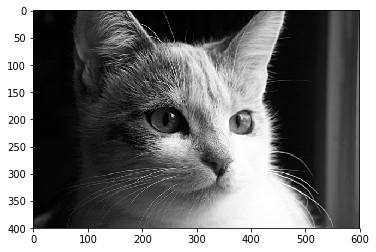

In [4]:
# import parrot and cat, and show them.
import pandas as pd
cat = cv2.imread('C:\\Users\\banak\\Downloads\\cat.jpg') # Reading the image using OpenCV
#plt.axis("off") # To delete the axes
plt.imshow(cat, cmap='gray')

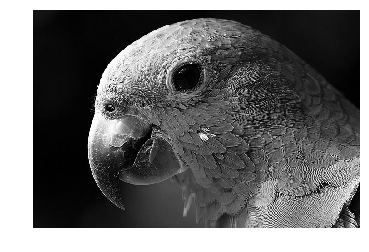

In [5]:
parrot = cv2.imread('C:\\Users\\banak\\Downloads\\parrot.jpg')
plt.axis("off")
plt.imshow(cv2.cvtColor(parrot, cv2.COLOR_RGB2GRAY), cmap = 'gray') #To convert RGB to gray scale. 

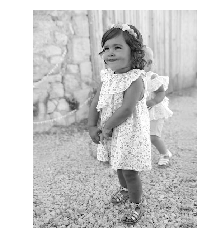

In [6]:
# load baby image and convert it to grayscale
baby = cv2.imread('C:\\Users\\banak\\Downloads\\baby.jpg')
plt.axis("off")
baby_gray=plt.imshow(cv2.cvtColor(baby, cv2.COLOR_RGB2GRAY), cmap = 'gray')

In [7]:
# Haar Cascade Classifier
# this is to download classifier
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml -P drive/gaze
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml -P drive/gaze

--2019-11-30 14:54:56--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.36.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.36.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: 'drive/gaze/haarcascade_eye.xml.10'

     0K .......... .......... .......... .......... .......... 14%  635K 0s
    50K .......... .......... .......... .......... .......... 29% 1.37M 0s
   100K .......... .......... .......... .......... .......... 44%  449K 0s
   150K .......... .......... .......... .......... .......... 59% 1.25M 0s
   200K .......... .......... .......... .......... .......... 74% 4.96M 0s
   250K .......... .......... .......... .......... .......... 89% 43.1M 0s
   300K .......... .......... .......... ...                  100% 40.3M=0.3s

2019-11-30 14:54:56 (1.18 MB/s) -

In [8]:
face_cascade = cv2.CascadeClassifier('drive/gaze/haarcascade_frontalface_default.xml') # Cascade Classifier Object. 
# Input is the path to the classifier file.
# You have to download this file online and provide the path. 
baby = cv2.imread('C:\\Users\\banak\\Downloads\\baby.jpg') # Load image
baby_gray = cv2.cvtColor(baby, cv2.COLOR_RGB2GRAY) # Convert to grayscale
faces = face_cascade.detectMultiScale(baby_gray, scaleFactor=1.3, minNeighbors=4)
print('output type = ',type(faces)) 
print('shape = ',faces.shape) # The shape will be (N x 4). N is the number of faces. 
print('output = ',faces)
#print number of faces
print('number of faces = ',faces.shape[0])

output type =  <class 'numpy.ndarray'>
shape =  (1, 4)
output =  [[182  73  86  86]]
number of faces =  1


In [9]:
# when no match (face) is found by the detectMultiScale method call, then it will return an empty Python tuple.
faces_2 = face_cascade.detectMultiScale(cat, scaleFactor=1.3, minNeighbors=4)
print(faces_2)

()


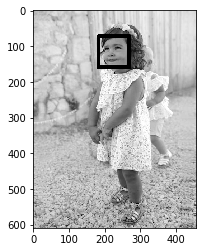

In [10]:
# to finish
x1, y1, w, h = faces[0] # Start point
x2 = x1+w # x2 and y2 are the End points. 
y2 = y1+h
plt.imshow(cv2.rectangle(baby_gray, (x1,y1),(x2,y2),(0,0,255),10), cmap='gray')

In [11]:
family = cv2.imread('C:\\Users\\banak\\Downloads\\family.jpg') # Load image
family_gray = cv2.cvtColor(family, cv2.COLOR_RGB2GRAY) # Convert to grayscale
faces_3 = face_cascade.detectMultiScale(family_gray, scaleFactor=1.05, minNeighbors=5)
# Scale factor shrinks the image if small. large scale factor expands the face image and 
# will not be able to detect faces if too large scale factor
print('output type = ',type(faces_3)) 
print('shape = ',faces_3.shape) # The shape will be (N x 4). N is the number of faces. 
print('output = ',faces_3)
#print number of faces
print('number of faces = ',faces_3.shape[0])

output type =  <class 'numpy.ndarray'>
shape =  (2, 4)
output =  [[ 59  56  38  38]
 [131  54  39  39]]
number of faces =  2


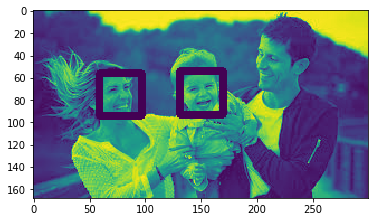

In [12]:
for x,y,w,h in faces_3:
    plt.imshow(cv2.rectangle(family_gray,(x,y),(x+w,y+h),(0,0,255),5)) 

In [13]:
# If the image has more than 1 face, then we use for loop. 
twins = cv2.imread('C:\\Users\\banak\\Downloads\\twins.jpg') # Load image
twins_gray = cv2.cvtColor(twins, cv2.COLOR_RGB2GRAY) # Convert to grayscale
faces_4 = face_cascade.detectMultiScale(twins_gray, scaleFactor=1.3, minNeighbors=4)
print('output type = ',type(faces_4)) 
print('shape = ',faces_4.shape) # The shape will be (N x 4). N is the number of faces. 
print('output = ',faces_4)
#print number of faces
print('number of faces = ',faces_4.shape[0])

output type =  <class 'numpy.ndarray'>
shape =  (2, 4)
output =  [[299 213 331 331]
 [772 233 359 359]]
number of faces =  2


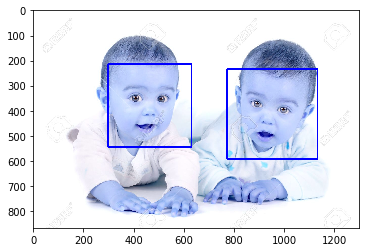

In [14]:
for x,y,w,h in faces_4:
    plt.imshow(cv2.rectangle(twins,(x,y),(x+w,y+h),(0,0,255),5)) # Here I used RGB image. Not the grayscal image.

In [15]:
# Function to detect faces using Haar Cascade classifier
class class_face_cascade:
    def __init__(self):
        face_cascade = cv2.CascadeClassifier('drive/gaze/haarcascade_frontalface_default.xml')
    
    def detect_n_plot(self, im_path, scaleFactor=1.1, minNeighbors=3):
        image = cv2.imread(im_path) # Load image
        image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # Convert to grayscale
        faces = face_cascade.detectMultiScale(image_gray, scaleFactor = scaleFactor, minNeighbors = minNeighbors)
        for x,y,w,h in faces:
            detected_faces = plt.imshow(cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),5))
        return detected_faces


Time:  0.07272380000006251


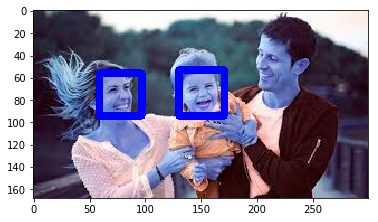

In [16]:
import timeit
start = timeit.default_timer()
class_object = class_face_cascade()
class_object.detect_n_plot(im_path='C:\\Users\\banak\\Downloads\\family.jpg')
stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  0.2261234999999715


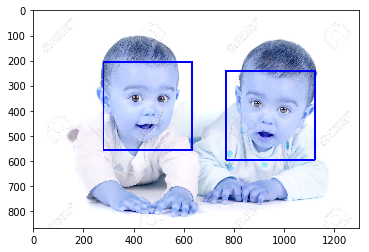

In [17]:
start = timeit.default_timer()
class_object.detect_n_plot(im_path='C:\\Users\\banak\\Downloads\\twins.jpg')
stop = timeit.default_timer()
print('Time: ', stop - start) 

In [18]:
# Using LBP Cascade classifier to check for improvement
import time

class class_face_cascade2:
    def __init__(self, lbp=False):
       # now make choice of 2 methods: lbp and haar
        face_cascade = cv2.CascadeClassifier('drive/gaze/lbpcascade_frontalface_default.xml')
    
    def detect_n_plot(self, im_path, scaleFactor=1.1, minNeighbors=3):
        image = cv2.imread(im_path) # Load image
        image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # Convert to grayscale
        faces = face_cascade.detectMultiScale(image_gray, scaleFactor = scaleFactor, minNeighbors = minNeighbors)
        for x,y,w,h in faces:
            detected_faces = plt.imshow(cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),5))
        return detected_faces

Time:  0.02474379999989651


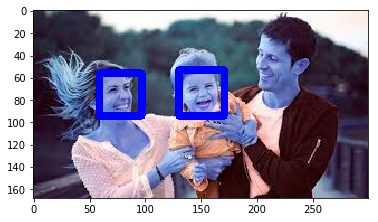

In [19]:
# compare times for all images for both methods
start = timeit.default_timer()
class_object_2 = class_face_cascade2()
class_object_2.detect_n_plot(im_path='C:\\Users\\banak\\Downloads\\family.jpg')
stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  0.20199060000004465


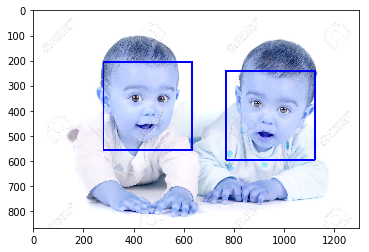

In [20]:
start = timeit.default_timer()
class_object_2.detect_n_plot(im_path='C:\\Users\\banak\\Downloads\\twins.jpg')
stop = timeit.default_timer()
print('Time: ', stop - start) 

Using MTCNN and facenet for face detection

In [21]:
# Installation of libraries
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1' -O facenet_keras.h5

'https://docs.google.com/uc?export=download: Scheme missing.
id: '=1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1 -O facenet_keras.h5': no such user


In [22]:
# facenet model
from keras.models import load_model
model = load_model('facenet_keras.h5')
!sudo pip install mtcnn

print(model.inputs)
print(model.outputs)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\banak\Anaconda3\lib\site-packages\keras\engine\saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


[<tf.Tensor 'input_1:0' shape=(?, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/cond/Merge:0' shape=(?, 128) dtype=float32>]


'sudo' is not recognized as an internal or external command,
operable program or batch file.


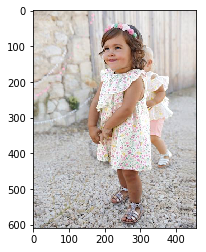

In [23]:
#install PIL library (named pillow), convert to RGB and plot
from PIL import Image
pil_image = Image.open('C:\\Users\\banak\\Downloads\\baby.jpg').convert('RGB')
plt.imshow(pil_image)

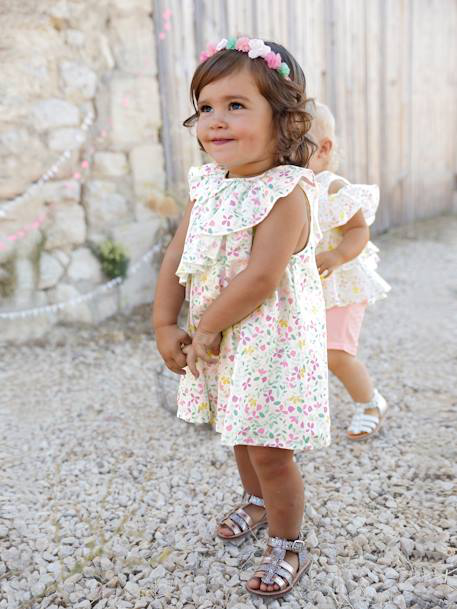

In [24]:
pil_image

In [25]:
import numpy as np
image_arr = np.asarray(pil_image)
image_arr.shape

(609, 457, 3)

In [26]:
# Applying MTCNN
from mtcnn.mtcnn import MTCNN
detector = MTCNN()
result = detector.detect_faces(image_arr)

In [27]:
print(result)

[{'box': [196, 71, 73, 94], 'confidence': 0.9999762773513794, 'keypoints': {'left_eye': (206, 108), 'right_eye': (236, 105), 'nose': (211, 123), 'mouth_left': (207, 142), 'mouth_right': (237, 139)}}]


In [28]:
len(result)

1

In [29]:
# The result is the list of JSON objects and 
# Each JSON object contains three main keys: ‘box’, ‘confidence’ and ‘keypoints’
#The bounding box is formatted as [x, y, width, height] under the key ‘box’.
#The confidence is the probability for a bounding box to be matching a face.
#The keypoints are formatted into a JSON object with the keys ‘left_eye’, ‘right_eye’, ‘nose’, ‘mouth_left’, ‘mouth_right’. Each keypoint is identified by a pixel position (x, y).

In [30]:
result[0]['box']

[196, 71, 73, 94]

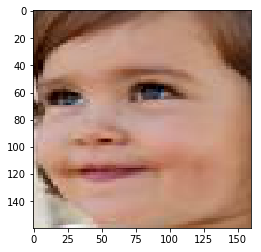

In [31]:
# Extracting Face coordinates and resizing it to 160x160 pixels
mx,my,mw,mh = result[0]['box']
mx2 = abs(mx) + abs(mw)
my2 = abs(my) + abs(mh)
face = image_arr[abs(my):my2,abs(mx):mx2]  # rows:colmns, row points will be on y-axis.
mtcnn_face = Image.fromarray(face) # converts the array interface to an image block 
# face is in array interface 
# mtcnn_face is converted form of array interface (face) with the help of Image.fromarray() method. 
mtcnn_160x160 = mtcnn_face.resize((160,160))
plt.imshow(mtcnn_160x160)


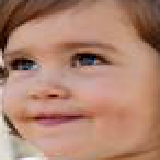

In [32]:
mtcnn_160x160

Applying MTCNN on Five celebrities dataset from kaggle.
Five celebrities dataset from kaggle: https://www.kaggle.com/dansbecker/5-celebrity-faces-dataset. 

In [33]:
from os import listdir

def extract_face(filename, required_size=(160, 160)):
    #from mtcnn.mtcnn import MTCNN
    pil_image = Image.open(filename).convert('RGB')
    pil_image = pil_image.convert('RGB')
    
    image_arr = np.asarray(pil_image)
    
    detector = MTCNN()
    result = detector.detect_faces(image_arr)
    
    for i in range(len(result)):
        x1, y1, w, h = result[i]['box']
        x2 = abs(x1) + abs(w)
        y2 = abs(y1) + abs(h)
        face = image_arr[abs(y1):y2, abs(x1):x2]
        mtcnn_face = Image.fromarray(face)
        mtcnn_160x160 = mtcnn_face.resize(required_size)
        
    return np.asarray(mtcnn_160x160)
# add here steps 3-4

#dirs = listdir('C:\\Users\\banak\\Downloads\\train\\ben_afflek')

# This would print all the files and directories
#for file in dirs:
#    img = extract_face('C:\\Users\\banak\\Downloads\\train\\ben_afflek\\'+file, required_size=(160, 160))
#    plt.imshow(img)

In [34]:
extract_face('C:\\Users\\banak\\Downloads\\train\\ben_afflek\\httpcsvkmeuaeccjpg.jpg')

array([[[ 27,  32,  36],
        [ 27,  32,  36],
        [ 45,  48,  53],
        ...,
        [ 76,  69,  63],
        [104,  95,  90],
        [104,  95,  90]],

       [[ 27,  32,  36],
        [ 27,  32,  36],
        [ 45,  48,  53],
        ...,
        [ 76,  69,  63],
        [104,  95,  90],
        [104,  95,  90]],

       [[ 23,  27,  30],
        [ 23,  27,  30],
        [ 40,  44,  47],
        ...,
        [ 50,  42,  39],
        [ 57,  50,  44],
        [ 57,  50,  44]],

       ...,

       [[253, 254, 246],
        [253, 254, 246],
        [253, 254, 246],
        ...,
        [ 57,  62,  58],
        [ 71,  73,  68],
        [ 71,  73,  68]],

       [[253, 255, 244],
        [253, 255, 244],
        [253, 255, 244],
        ...,
        [ 51,  56,  52],
        [ 77,  79,  74],
        [ 77,  79,  74]],

       [[253, 255, 244],
        [253, 255, 244],
        [253, 255, 244],
        ...,
        [ 51,  56,  52],
        [ 77,  79,  74],
        [ 77,  79,  74]]

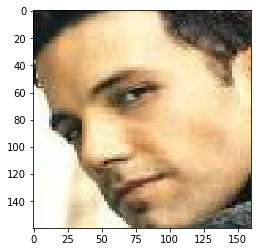

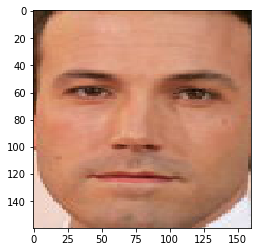

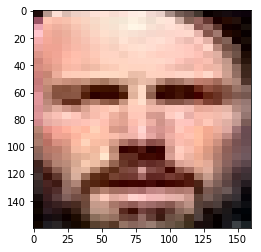

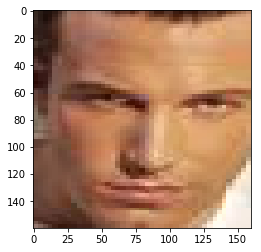

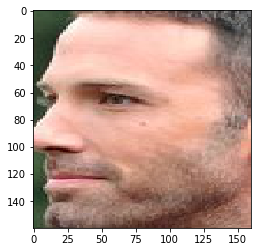

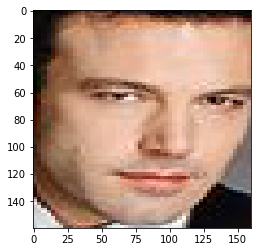

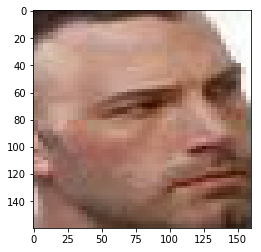

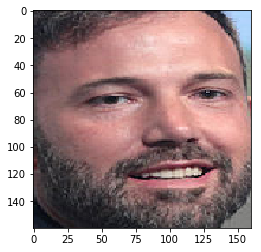

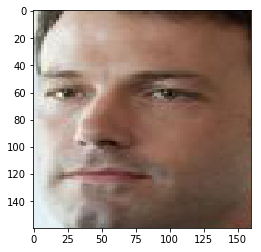

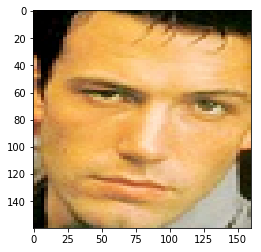

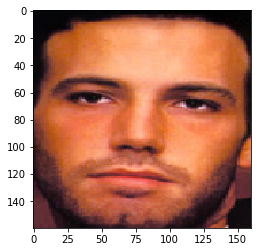

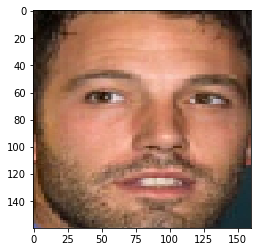

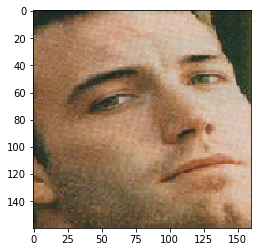

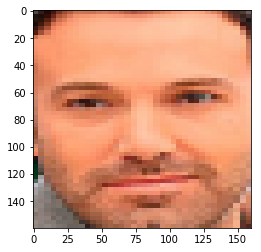

Time:  78.13186859999996


In [35]:
start = timeit.default_timer()
path = 'C:\\Users\\banak\\Downloads\\train\\ben_afflek\\'
for file in listdir('C:\\Users\\banak\\Downloads\\train\\ben_afflek'):
    image = extract_face(path+file)
    plt.imshow(image)
    plt.show()
stop = timeit.default_timer()
print('Time: ', stop - start) 

In [36]:
len(listdir('C:\\Users\\banak\\Downloads\\train\\mindy_kaling'))

22

In [37]:
['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling']

['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling']

In [38]:
l=[]
for i in listdir('C:\\Users\\banak\\Downloads\\train'):
    output_list = listdir('C:\\Users\\banak\\Downloads\\train'+'\\'+i )
    l.append(output_list)
print(len(l[4]))

22


In [40]:
# List of faces in a directory
def load_faces(directory):
    faces = []
    for file in listdir(directory):
        for image in listdir(directory+'\\'+file):
            face = extract_face(directory + '\\' + file + '\\' + image)
            faces.append(face)
    return faces
	 #return list of faces in given directory 1

In [35]:
############################
# Error: tile cant be extended
# Solution: change take absolute values in the extract face mehod.

In [35]:
start = timeit.default_timer()
path = 'C:\\Users\\banak\\Downloads\\train'
l=[]
output_list = load_faces(path)
l.append(output_list)
print(l)
stop = timeit.default_timer()
print('Time:', stop-start)


[[array([[[ 27,  32,  36],
        [ 27,  32,  36],
        [ 45,  48,  53],
        ...,
        [ 76,  69,  63],
        [104,  95,  90],
        [104,  95,  90]],

       [[ 27,  32,  36],
        [ 27,  32,  36],
        [ 45,  48,  53],
        ...,
        [ 76,  69,  63],
        [104,  95,  90],
        [104,  95,  90]],

       [[ 23,  27,  30],
        [ 23,  27,  30],
        [ 40,  44,  47],
        ...,
        [ 50,  42,  39],
        [ 57,  50,  44],
        [ 57,  50,  44]],

       ...,

       [[253, 254, 246],
        [253, 254, 246],
        [253, 254, 246],
        ...,
        [ 57,  62,  58],
        [ 71,  73,  68],
        [ 71,  73,  68]],

       [[253, 255, 244],
        [253, 255, 244],
        [253, 255, 244],
        ...,
        [ 51,  56,  52],
        [ 77,  79,  74],
        [ 77,  79,  74]],

       [[253, 255, 244],
        [253, 255, 244],
        [253, 255, 244],
        ...,
        [ 51,  56,  52],
        [ 77,  79,  74],
        [ 77,  79,  74

In [37]:
np.array(output_list).shape

(93, 160, 160, 3)

In [ ]:
'C:\\Users\\banak\\Downloads\\train\\ben_afflek\\httpcsvkmeuaeccjpg.jpg'

In [38]:
# Extracting faces using FaceNet
from numpy import expand_dims

def get_features(model, face_pixels):
    flat_face_pixels = np.array(face_pixels)
    norm_pixels = (flat_face_pixels-flat_face_pixels.mean())/flat_face_pixels.std()
    #norm_pixels = expand_dims_dims(norm_pixels)
    X_128 = model.predict(norm_pixels)
    return X_128
  #return vector of features for face_pixels image

In [39]:
# Loading features
def load_data(directory):
    image_list = load_faces(directory)
    y = []
    #image_list = load_faces(directory)
    X = get_features(model,image_list)
    for direc in (listdir(directory)):
        for label in (listdir(directory+direc)):
            y.append(direc)

    y = np.array(y)
    print('Xshape = %s and yshape = %s '%(X.shape, y.shape))
    return X, y

In [40]:
start = timeit.default_timer()
X_train, y_train = load_data('C:\\Users\\banak\\Downloads\\train\\')
stop = timeit.default_timer()
print('Time = %s'%(stop-start))

Xshape = (93, 128) and yshape = (93,) 
Time = 3444.5151586999996


In [41]:
# Normalizing the features using l2 and label encoding for labels
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder

In [59]:
transformer = Normalizer()
transformer.fit(X_train)

Normalizer(copy=True, norm='l2')

In [60]:
transformer

Normalizer(copy=True, norm='l2')

In [61]:
Xt_train=transformer.transform(X_train)

In [62]:
Xt_train

array([[ 0.03329594,  0.09368943, -0.10828167, ..., -0.03382717,
        -0.05377199,  0.10468593],
       [-0.07704969,  0.11006103,  0.00954854, ..., -0.02631567,
        -0.03010283,  0.13695094],
       [-0.07569   , -0.19295111, -0.0270642 , ..., -0.04321955,
        -0.04420618,  0.01300285],
       ...,
       [ 0.13217248,  0.03177963,  0.01996078, ...,  0.08648287,
         0.06646633, -0.09345207],
       [-0.02540144, -0.00581409,  0.0353235 , ...,  0.1001156 ,
        -0.00962526, -0.1069876 ],
       [ 0.00944225, -0.08515297,  0.0625205 , ...,  0.09159333,
         0.12743741, -0.08487726]], dtype=float32)

In [46]:
encoder = LabelEncoder()
yt_train = encoder.fit_transform(y_train)

In [47]:
yt_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4], dtype=int64)

## using SVM

In [53]:
# 
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(Xt_train,yt_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [54]:
y_pred = classifier.predict(Xt_train)

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yt_train,y_pred)

In [57]:
cm

array([[14,  0,  0,  0,  0],
       [ 0, 17,  0,  0,  0],
       [ 0,  1, 20,  0,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 22]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(yt_train, y_pred)

0.989247311827957

# ON Test Data

In [58]:
start = timeit.default_timer()
X_test, y_test = load_data('C:\\Users\\banak\\Downloads\\val\\')
stop = timeit.default_timer()
print('Time = %s'%(stop-start))

Xshape = (25, 128) and yshape = (25,) 
Time = 1616.687978500001


In [63]:
Xt_test = transformer.transform(X_test)

In [64]:
yt_test = encoder.transform(y_test)

In [65]:
yt_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4], dtype=int64)

In [66]:
yt_pred = classifier.predict(Xt_test)

In [67]:
cmt = confusion_matrix(yt_test,yt_pred)

In [68]:
cmt

array([[5, 0, 0, 0, 0],
       [0, 5, 0, 0, 0],
       [0, 1, 4, 0, 0],
       [0, 0, 0, 5, 0],
       [0, 0, 0, 0, 5]], dtype=int64)

In [69]:
accuracy_score(yt_test, yt_pred)

0.96